In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import signal
import seaborn as sns
import matplotlib.pyplot as plt
import pywt
import os
import time
import h5py

In [2]:
for dirname, _, filenames in os.walk('.\data'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

.\data\G04_FoG_trial_1_emg.csv
.\data\G04_FoG_trial_2_emg.csv
.\data\G06_FoG_trial_1_emg.csv
.\data\G06_FoG_trial_2_emg.csv
.\data\G06_FoG_trial_3_emg.csv
.\data\G07_Freezing_Trial1_trial_1_emg.csv
.\data\G08_FoG_1_trial_1_emg.csv
.\data\G08_FoG_2_trial_1_emg.csv
.\data\G11_FoG_trial_1_emg.csv
.\data\G11_FoG_trial_2_emg.csv
.\data\P379_M050_2_OFF_A_FoG_trial_1_emg.csv
.\data\P379_M050_2_OFF_A_FoG_trial_2_emg.csv
.\data\P379_M050_2_OFF_A_FoG_trial_3_emg.csv
.\data\P379_M050_2_OFF_B_FoG_trial_1_emg.csv
.\data\P379_M050_2_OFF_B_FoG_trial_2_emg.csv
.\data\P379_M050_2_OFF_B_FoG_trial_3_emg.csv
.\data\P551_M050_2_A_FoG_trial_1_emg.csv
.\data\P551_M050_2_B_FoG_trial_1_emg.csv
.\data\P551_M050_2_B_FoG_trial_2_emg.csv
.\data\P812_M050_2_B_FoG_trial_1_emg.csv
.\data\P812_M050_2_B_FoG_trial_2_emg.csv
.\data\其他\labels.txt
.\data\其他\P812_M050_2_B_FoG_trial1_annotation.csv
.\data\其他\P812_M050_2_B_FoG_trials.mat
.\data\其他\P812_M050_2_B_FoG_trial_1_out_left_foot.csv
.\data\其他\P812_M050_2_B_FoG_trial_1

In [70]:
emg_data = pd.read_csv('.\data\P812_M050_2_B_FoG_trial_1_emg.csv',index_col=0)
emg_data2 = pd.read_csv('.\data\P379_M050_2_OFF_A_FoG_trial_1_emg.csv',index_col=0)
emg_data3 = pd.read_csv('.\data\正常\G02_Walking_trial_1_emg.csv',index_col=0)

In [71]:
emg_data

,Label1,Label2,LEFT_TA,LEFT_TS,LEFT_BF,LEFT_RF,RIGHT_TA,RIGHT_TS,RIGHT_BF,RIGHT_RF
Time,,,,,,,,,,
0.000,0,0,-3,2,-4.0,-1.0,0.0,2.0,1.0,-2.0
0.001,0,0,-5,10,0.0,-2.0,-4.0,0.0,-7.0,-2.0
0.002,0,0,-6,11,1.0,0.0,-4.0,-1.0,-2.0,-3.0
0.003,0,0,0,-2,0.0,-3.0,-6.0,-2.0,-5.0,-8.0
0.004,0,0,0,-8,-3.0,-3.0,-4.0,-3.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
79.826,0,0,1,15,NaN,NaN,-2.0,5.0,-2.0,8.0
79.827,0,0,-1,25,-1.0,81.0,3.0,2.0,2.0,8.0
79.828,0,0,2,-1,NaN,NaN,0.0,-2.0,2.0,5.0


In [35]:
#emg_data = emg_data.fillna({'LEFT_BF':emg_data.LEFT_BF.mean(),
#                           'LEFT_RF':emg_data.LEFT_RF.mean(),
#                           'RIGHT_TA':emg_data.RIGHT_TA.mean(),
#                           'RIGHT_TS':emg_data.RIGHT_TS.mean(),
#                           'RIGHT_BF':emg_data.RIGHT_BF.mean(),
#                           'RIGHT_RF':emg_data.RIGHT_RF.mean()})
emg_data = emg_data.dropna().reset_index()
#emg_data = emg_data[emg_data.Label1==emg_data.Label2].reset_index(drop=True)
emg_data.isna().sum()

index       0
Time        0
Label1      0
Label2      0
LEFT_TA     0
LEFT_TS     0
LEFT_BF     0
LEFT_RF     0
RIGHT_TA    0
RIGHT_TS    0
RIGHT_BF    0
RIGHT_RF    0
dtype: int64

In [126]:
emg_data2 = emg_data2.fillna({'RIGHT_TA':emg_data2.RIGHT_TA.mean()})
emg_data2 = emg_data2[emg_data2.Label1==emg_data2.Label2].reset_index(drop=True)
emg_data2.isna().sum()

Time        0
Label1      0
Label2      0
LEFT_TA     0
LEFT_TS     0
LEFT_BF     0
LEFT_RF     0
RIGHT_TA    0
RIGHT_TS    0
RIGHT_BF    0
RIGHT_RF    0
dtype: int64

In [82]:
emg_data3 = emg_data3.fillna({'LEFT_TA':emg_data3.LEFT_TA.mean(),
                           'LEFT_TS':emg_data3.LEFT_TS.mean(),
                           'LEFT_BF':emg_data3.LEFT_BF.mean(),
                           'LEFT_RF':emg_data3.LEFT_RF.mean(),
                           'RIGHT_TA':emg_data3.RIGHT_TA.mean(),
                           'RIGHT_TS':emg_data3.RIGHT_TS.mean(),
                           'RIGHT_BF':emg_data3.RIGHT_BF.mean(),
                           'RIGHT_RF':emg_data3.RIGHT_RF.mean()})
emg_data3 = emg_data3[emg_data3.Label1==emg_data3.Label2].reset_index(drop=True)
emg_data3.isna().sum()

Time        0
Label1      0
Label2      0
LEFT_TA     0
LEFT_TS     0
LEFT_BF     0
LEFT_RF     0
RIGHT_TA    0
RIGHT_TS    0
RIGHT_BF    0
RIGHT_RF    0
dtype: int64

In [55]:
def scale_data(data,sc,cwt=True):
    M,N,I,J = data.shape
    result = np.zeros((M,N,I,J))
    #sc = StandardScaler()
    if cwt:
        for i in range(M):
            for j in range(J):
                cwtmatr = data[i,:,:,j]
                result[i,:,:,j] = sc.fit_transform(cwtmatr)
                
        return result
    else:
        X = data.iloc[:,3:]
        X = sc.fit_transform(X)
        data.iloc[:,3:] = X
        return data

def generate_window_slide_data(data,width = 256,stride = 64):
    l = len(data)
    end = (l-width)//stride+1
    X = []
    Y = []
    sc = StandardScaler(with_mean=False)
    for i in range(end):
        if len(set(data.Label2[i*stride:i*stride+width])) == 1:
                Y += [data.Label2[i*stride]]
                x_sc = sc.fit_transform(np.array(data.iloc[i*stride:i*stride+width,3:]))
                X += [x_sc]
                #X += [np.array(data.iloc[i*stride:i*stride+width,3:])]
            #print(set(data.Label2[i*stride:i*stride+width]))
        else:
            #print(set(data.Label2[i*stride:i*stride+width]))
            continue
    return np.array(X,dtype=np.float32),np.array(Y,dtype=np.uint8)

#def generate_CWT_feature(data,widths=260,wavelet = signal.ricker):
#    n,t,c = data.shape
#    cwtmatr = np.zeros((n,widths,t,c))
#    for i in range(n):
#        for j in range(c):
#            cwtmatr[i,:,:,j] = signal.cwt(data[i,:,j],wavelet,np.arange(1,widths+1))
#    return cwtmatr


def generate_CWT_feature(data,widths=260,wavelet = 'mexh'):
    n,t,c = data.shape
    cwtmatr = np.zeros((n,widths,t,c),dtype=np.float32)
    for i in range(n):
        for j in range(c):
            cwtmatr[i,:,:,j],_ = pywt.cwt(data[i,:,j],np.arange(1,widths+1),wavelet)
    return cwtmatr


In [24]:
sc = StandardScaler()
#sc.fit(emg_data.iloc[:,3:])
#emg_data_sc = scale_data(emg_data,sc)
#emg_data_sc2 = scale_data(emg_data3,sc)
#emg_data_sc.iloc[:,8].plot()
cwtmatr.shape

(1097, 64, 256, 8)

In [56]:
width = 256
stride = 64
widths_scale = 64
x,y = generate_window_slide_data(emg_data,width,stride)
#x2,y2 = generate_window_slide_data(emg_data3,width,stride)

In [57]:
x.shape

(1091, 256, 8)

In [12]:
path = './processed data/data_set_after_window.hdf5'
with h5py.File(path,'r') as f:
    x = f['cwt_data'][...]
    y = f['label2'][...]

In [3]:
path = './processed data/P812_trial_1_W256_S64_WS64_CWT.hdf5'
with h5py.File(path,'r') as f:
    cwtmatr = f['cwt_data'][...]
    y = f['label2'][...]

In [19]:
x[20000].shape

(256, 8)

In [58]:
start = time.time()
cwtmatr = generate_CWT_feature(x,widths_scale,'mexh')
#cwtmatr2 = generate_CWT_feature(x2,widths_scale,'mexh')
end = time.time()
duration = end-start
print('duration: %f'%(duration))

duration: 69.849566


In [59]:
#cwtmatr=StandardScaler(cwtmatr)
#cwtmatr_sc = scale_data(cwtmatr,sc)
cwtmatr.max()

15.226567

In [ ]:
pywt.wavelist(kind='continuous')

In [ ]:
import h5py

file = './processed data/P812_trial_1_W%d_S%d_WS%d_CWT.hdf5'%(width,stride,widths_scale)
with h5py.File(file,'w') as f:
    f.create_dataset('cwt_data',data=cwtmatr, maxshape=(None,260,260,8),
                     chunks = True,dtype = np.float32)
    f.create_dataset('label2',data=y, dtype = np.int8)

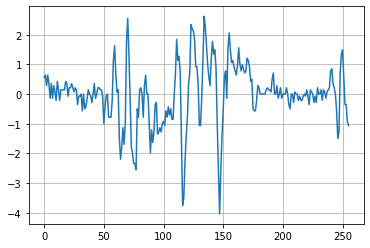

In [55]:
plt.plot(x[110,:,4])
plt.grid(True)

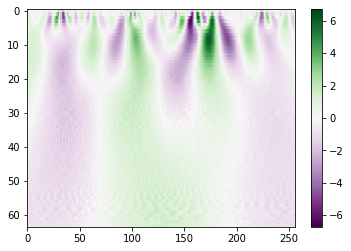

0


In [67]:
temp = 30
channel = 0
plt.imshow(cwtmatr[temp,:,:,channel], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr[temp,:,:,channel]).max(), 
           vmin=-abs(cwtmatr[temp,:,:,channel]).max())
plt.colorbar()
plt.show()
print(y[temp])

In [93]:
#label = y[ind]
#label[label==2]=1
y.shape

(44530,)

In [10]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import save_model,load_model
from tensorflow.keras import callbacks, Model
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import TruncatedNormal
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve,confusion_matrix
import tensorflow as tf
from tensorflow.keras import backend as K

In [60]:
#ind = ((y[:20000]==1) | (y[:20000]==2) | (y[:20000]==3) | (y[:20000]==4) | (y[:20000]==6))
#y_02 = y[:20000]
ind = ((y==1) | (y==2) | (y==3) | (y==4) | (y==6))
y_02 = y.copy()
y_02[ind]=1
X_full,X_test,y_full,y_test = train_test_split(cwtmatr,y_02,test_size = 0.2,random_state=60)
X_train,X_valid,y_train,y_valid= train_test_split(X_full,y_full,test_size = 0.2,random_state=60)

In [66]:
input_ = layers.Input(shape=cwtmatr.shape[1:])
max_pool = layers.MaxPooling2D(2)(input_)
#bn = layers.BatchNormalization()(input_)
conv1 = layers.Conv2D(128,5,strides=(2,2),kernel_initializer=TruncatedNormal(),activation='elu',padding='same')(max_pool)
max_pool1 = layers.MaxPooling2D(2)(conv1)
conv2 = layers.Conv2D(64,5,strides=(2,2),kernel_initializer=TruncatedNormal(),activation='elu',padding='same')(max_pool1)
max_pool2 = layers.MaxPooling2D(2)(conv2)
flatten = layers.Flatten()(max_pool2)
#layer1 = Dense(256,activation = 'relu')(flatten)
dropout1 = layers.Dropout(0.3)(flatten)
layer2 = layers.Dense(128,activation = 'elu')(dropout1)
dropout2 = layers.Dropout(0.3)(layer2)
output = layers.Dense(2,activation = 'softmax')(dropout2)
model = keras.Model(inputs=[input_],outputs=[output])

In [62]:
#ind = ((y==0) | (y==2))
#bce = CategoricalCrossentropy()
model.compile(loss = 'sparse_categorical_crossentropy' ,optimizer='adam',metrics=['accuracy'])
#oh_ec = OneHotEncoder()
#label = oh_ec.fit_transform(K.eval(y)[ind,tf.newaxis]).toarray()

In [63]:
early_stopping = callbacks.EarlyStopping(patience = 10,monitor = 'val_accuracy', restore_best_weights=True)

In [64]:
history = model.fit(X_train,y_train,validation_data=[X_valid,y_valid],
                    epochs=100,batch_size=50,
                   callbacks=[early_stopping])

Train on 697 samples, validate on 175 samples
Epoch 1/100
697/697 [==============================] - 15s 21ms/sample - loss: 3.4199 - accuracy: 0.5954 - val_loss: 0.9687 - val_accuracy: 0.4229
Epoch 2/100
697/697 [==============================] - 15s 21ms/sample - loss: 0.8551 - accuracy: 0.6083 - val_loss: 0.6053 - val_accuracy: 0.6171
Epoch 3/100
697/697 [==============================] - 15s 21ms/sample - loss: 0.6913 - accuracy: 0.6600 - val_loss: 0.6333 - val_accuracy: 0.7657
Epoch 4/100
697/697 [==============================] - 15s 22ms/sample - loss: 0.6144 - accuracy: 0.6973 - val_loss: 0.6168 - val_accuracy: 0.8000
Epoch 5/100
697/697 [==============================] - 15s 21ms/sample - loss: 0.5151 - accuracy: 0.7547 - val_loss: 0.5640 - val_accuracy: 0.7886
Epoch 6/100
697/697 [==============================] - 15s 21ms/sample - loss: 0.4393 - accuracy: 0.7791 - val_loss: 0.5396 - val_accuracy: 0.7771
Epoch 7/100
697/697 [==============================] - 15s 21ms/sample -

In [65]:
model.evaluate(X_test,y_test)

219/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.6933607576100249, 0.8082192]

In [164]:
y_pred = model.predict(X_full)
oh_ec = OneHotEncoder()
label = oh_ec.fit_transform(y_full[:,np.newaxis]).toarray()
precision, recall, threshold = precision_recall_curve(label[:,0],y_pred[:,0])

array([[466,   4],
       [  1, 859]], dtype=int64)

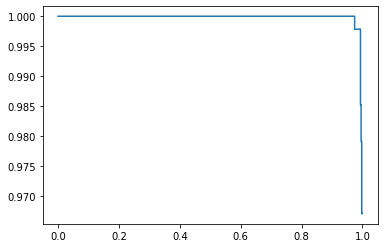

In [165]:
plt.plot(recall,precision)
confusion_matrix(y_full,np.where(y_pred<0.5,1,0)[:,0])

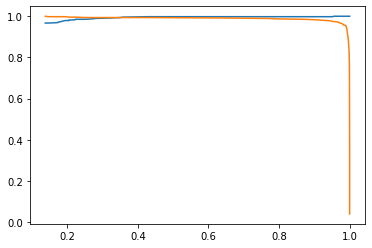

In [166]:
plt.plot(threshold,precision[:-1])
plt.plot(threshold,recall[:-1])

In [95]:
#model = load_model('./model/Mexh_W256_S32_WS32.h5')
ind = ((y2==1) | (y2==2) | (y2==3))
y_02=y2
y_02[ind]=1
model.evaluate(cwtmatr,y[25000:35000])

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.8236013696538722, 0.7228]

In [78]:
(model.predict(cwtmatr2).argmax(axis=1)==y_02).sum()

284

In [87]:
cwtmatr.shape

(20000, 32, 256, 8)

array([[ 651,    7],
       [   9, 1167]], dtype=int64)

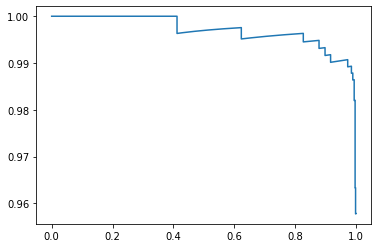

In [53]:
y_pred = model.predict(cwtmatr[ind])
oh_ec = OneHotEncoder()
label = oh_ec.fit_transform(y_02[:,np.newaxis]).toarray()
precision, recall, threshold = precision_recall_curve(label[:,0],y_pred[:,0])
plt.plot(recall,precision)
confusion_matrix(y_02,np.where(y_pred<0.5,1,0)[:,0])

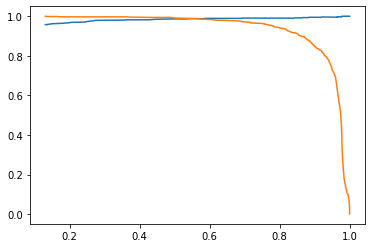

In [54]:
plt.plot(threshold,precision[:-1])
plt.plot(threshold,recall[:-1])

In [232]:
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 32, 256, 8)]      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 256, 8)        32        
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 128, 128)      25728     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 64, 128)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 32, 64)         204864    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 2, 16, 64)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 2048)              0   

(0, 1)

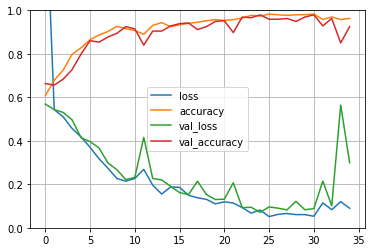

In [22]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)

In [39]:
model.save('./model/Mexh_W%d_S%d_WS%d.h5'%(width,stride,widths_scale))